# Classifying Dog Images with Tensorflow and Keras

In [49]:
# Load libraries and packages needed for image classification project
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [50]:
# set the breed of dogs that the program will be classifying 

breeds = ['beagle','bernese_mountain_dog','doberman','labrador_retriever','siberian_husky']

In [51]:
# Set the arguments for the tensorflow instance
args = {
    'labels':'inferred',          # Infers the name of the dog by the name of the directory the picture is in
    'label_mode':'categorical',   # Each breed is one category
    'batch_size': 32,             # how many images are loaded and processed at once by neural network
    'image_size': (256,256),      # resize all images to the same size 
    'seed': 1,                    # set seed for reproducability
    'validation_split': .2,       # split training and testing : 80% train and 20% test
    'class_names': breeds         # name of the categories
}

In [52]:
# Training data 

train = tf.keras.utils.image_dataset_from_directory(           # Loads images from directory into tensorflow training dataset
    'images',
    subset='training',
    **args
)

Found 540 files belonging to 5 classes.
Using 432 files for training.


In [53]:
# Test Data

test = tf.keras.utils.image_dataset_from_directory(           # Loads images from directory into tensorflow  testing dataset
    'images',
    subset='validation',
    **args
)

Found 540 files belonging to 5 classes.
Using 108 files for validation.


In [54]:
train  # Can se that this is a batch dataset, a.k.a batch is a tensorlfow class that represents data loaded into tensorflow

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [55]:
first = train.take(1)   # Saves the first batch of images to a variable 'first'... from above: 1 batch = 32 images


In [56]:
# create two new variables images, which will hold the first 32 images and labels, which will hold the labels of the first 32 images

images, labels = list(first)[0]  


2023-06-25 18:00:56.921667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [432]
	 [[{{node Placeholder/_4}}]]
2023-06-25 18:00:56.921938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [432]
	 [[{{node Placeholder/_4}}]]
2023-06-25 18:00:57.129167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-06-25 18:00:57.309148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-06-25 18:00:57.310288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

In [57]:
# take a look at an image in the batch 

first_image = images[5]
#first_image                # saved as a numpy array that holds matrices of numbers coresponding to pixels and RGB content in the image


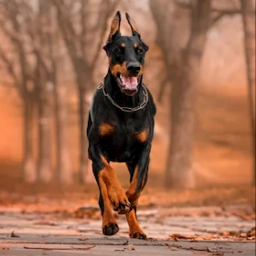

In [58]:
# convert above numpy arrays into the image using Pillow library

from PIL import Image
Image.fromarray(first_image.numpy().astype('uint8'))   # Pillow converts numpy matrices into the image itslef 


In [59]:
labels[0]   # numpy array shows binary inputs that tell us which kind of dog it is

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 0., 0., 0.], dtype=float32)>

In [60]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)   # Caches pictures in memory rather than hard disk to make algorithm more efficient
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)   # Caches pictures in memory rather than hard disk to make algorithm more efficient


In [61]:
# import keras packages for modeling and build sequential model

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential ([
    layers.Rescaling(1./255),    # Pixels in numpy array are from 0 - 255, so we rescale the pixels into numbers between 0-1 in order to help neural network be more efficient
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(256,256,3)),             # Create a convulutional layer that scans images and generates new matrices with features from the images, will do this 16 times, looking at 3x3 pixels nat a time(window)
    layers.Flatten(),
    layers.Dense(128,activation='relu'),  # dense network will take flattened layer and help facilitate predictions
    layers.Dense(len(breeds))             # this line will make the prediction
])

In [62]:
# Compile the model

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics =['accuracy'])     # optimizer tells model how to predict error and how to iterate, and loss function calculates error

In [63]:
# fit the model

history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)

Epoch 1/5


2023-06-25 18:00:57.974336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [432]
	 [[{{node Placeholder/_0}}]]
2023-06-25 18:00:57.974582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [432]
	 [[{{node Placeholder/_4}}]]
2023-06-25 18:00:58.791017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-06-25 18:00:58.966675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-06-25 18:00:58.967484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iC

 1/14 [=>............................] - ETA: 27s - loss: 1.5954 - accuracy: 0.2188

2023-06-25 18:01:00.206260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/14 [==============================] - ETA: 0s - loss: 167.1809 - accuracy: 0.2616

2023-06-25 18:01:09.805990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [108]
	 [[{{node Placeholder/_4}}]]
2023-06-25 18:01:09.806306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [108]
	 [[{{node Placeholder/_4}}]]


14/14 [==============================] - 13s 811ms/step - loss: 167.1809 - accuracy: 0.2616 - val_loss: 105.6426 - val_accuracy: 0.2593
Epoch 2/5
14/14 [==============================] - 11s 755ms/step - loss: 39.7653 - accuracy: 0.2986 - val_loss: 8.5605 - val_accuracy: 0.3704
Epoch 3/5
14/14 [==============================] - 10s 750ms/step - loss: 4.4783 - accuracy: 0.4815 - val_loss: 4.4011 - val_accuracy: 0.3981
Epoch 4/5
14/14 [==============================] - 11s 764ms/step - loss: 1.2992 - accuracy: 0.6667 - val_loss: 4.1257 - val_accuracy: 0.3889
Epoch 5/5
14/14 [==============================] - 11s 758ms/step - loss: 0.9046 - accuracy: 0.7315 - val_loss: 4.2267 - val_accuracy: 0.4074


In [64]:
# Summary of the model and its layers / how they are working

model.summary()

# Rescaling layer output the images and rescaled them
# Convulutional layer created 16 matrices of image features
# flattening layer flatened matrices into one lon vector
# Dense layer took that vector and use dit to make prediction
# Dense_3 seperated a single vector for each image indicating which class it belongs to

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 flatten_2 (Flatten)         (None, 1048576)           0         
                                                                 
 dense_4 (Dense)             (None, 128)               134217856 
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 134,218,949
Trainable params: 134,218,949
Non-trainable params: 0
_________________________________________________________________


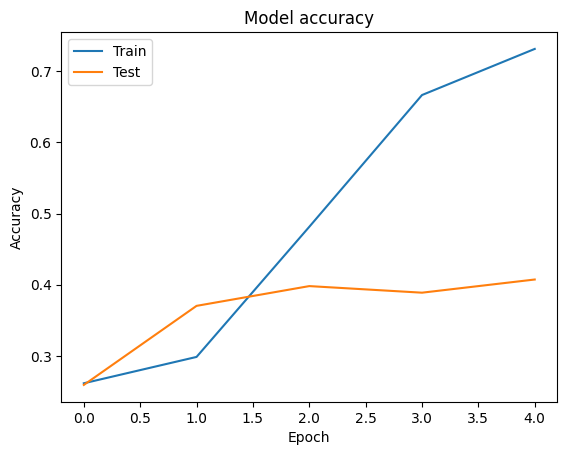

In [65]:
# Graph model accuracy with pandas
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)

plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

# Training accuracy went up but validation accuracy did not
# model may be overfit - random features are being implemented by model

In [66]:
# Account for overfitting and increas emodel accuracy
# paste model from before into function so as to not have to change the code every time

def train_model(network,epochs=5):
    model = Sequential(network)
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics =['accuracy'])
    history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df,model

In [67]:
# same netwrok as before, modified with new layers

network = [
    layers.Rescaling(1./255),    
    layers.Conv2D(16,4,padding='same',activation='relu',input_shape=(256,256,3)),     # increase window size to 4 from 3
    layers.MaxPooling2D(),                                                            # add max pooling 2d layer to reduce overfit and reduce number of parameters
    layers.Conv2D(32,4,padding='same',activation='relu',input_shape=(256,256,3)),     # add second convolutional layer with increased filters to 32, to let network pick up higher level features
    layers.MaxPooling2D(),                                                           # add another max pooling layer
    layers.Conv2D(64,4,padding='same',activation='relu',input_shape=(256,256,3)),    # add another convolutional layer with 64 filters for even higher level features
    layers.MaxPooling2D(),                                                           # another max pooling layer
    layers.Dropout(.2),                                                              # Dropout layer helps with overfitting by setting some outputs to 0 randomly, so network doesnt become too linked to trainjing data
    layers.Flatten(),
    layers.Dense(128,activation='relu'),  
    layers.Dense(len(breeds))             
]

# run model again

history_df,model = train_model(network)

Epoch 1/5


14/14 [==============================] - 8s 536ms/step - loss: 1.9868 - accuracy: 0.2384 - val_loss: 1.6154 - val_accuracy: 0.1852
Epoch 2/5
14/14 [==============================] - 7s 536ms/step - loss: 1.6011 - accuracy: 0.2245 - val_loss: 1.5918 - val_accuracy: 0.3148
Epoch 3/5
14/14 [==============================] - 8s 564ms/step - loss: 1.5411 - accuracy: 0.3102 - val_loss: 1.4764 - val_accuracy: 0.3889
Epoch 4/5
14/14 [==============================] - 8s 553ms/step - loss: 1.3121 - accuracy: 0.4491 - val_loss: 1.4402 - val_accuracy: 0.3704
Epoch 5/5
14/14 [==============================] - 8s 548ms/step - loss: 0.9835 - accuracy: 0.5856 - val_loss: 1.6947 - val_accuracy: 0.3333


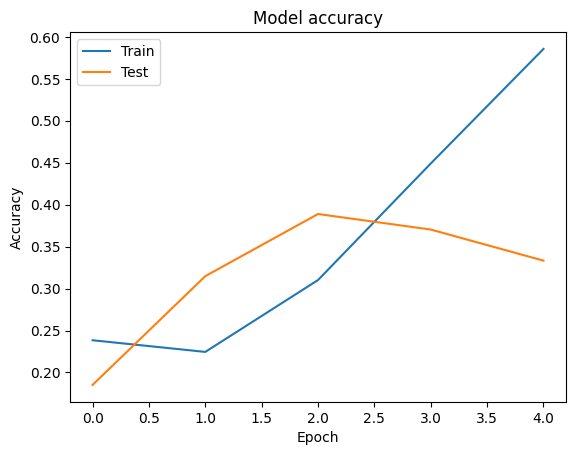

In [68]:
# Plot model accuracy

plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();
# Still overfitting

In [69]:
# Data augmentaion may help with overfitting with keras layers, set to a sequential layer
# set seeds for reproducibility 

data_augmentaion = tf.keras.Sequential([
    layers.RandomFlip('horizontal',seed=1),         # Randomly flips images from left to right which the model wuill see as a new image and increase accuracy
    layers.RandomRotation(.2,seed=1),               # Randomly raotates images for more information
    layers.RandomZoom(.2,seed=1)                   #randomly zooms images for more information for the model 
])

In [70]:
# add netwroks together to create full network

full_network = [data_augmentaion] + network


In [47]:
# Train the full network

history_df, model = train_model(full_network)

Epoch 1/5


14/14 [==============================] - 9s 561ms/step - loss: 1.1363 - accuracy: 0.5602 - val_loss: 1.3464 - val_accuracy: 0.5741
Epoch 2/5
14/14 [==============================] - 8s 556ms/step - loss: 0.9831 - accuracy: 0.6296 - val_loss: 1.3752 - val_accuracy: 0.6204
Epoch 3/5
14/14 [==============================] - 8s 555ms/step - loss: 0.9117 - accuracy: 0.6296 - val_loss: 1.3376 - val_accuracy: 0.6111
Epoch 4/5
14/14 [==============================] - 8s 559ms/step - loss: 0.9056 - accuracy: 0.6597 - val_loss: 1.3031 - val_accuracy: 0.5926
Epoch 5/5
14/14 [==============================] - 8s 558ms/step - loss: 0.8324 - accuracy: 0.6435 - val_loss: 1.5578 - val_accuracy: 0.5926


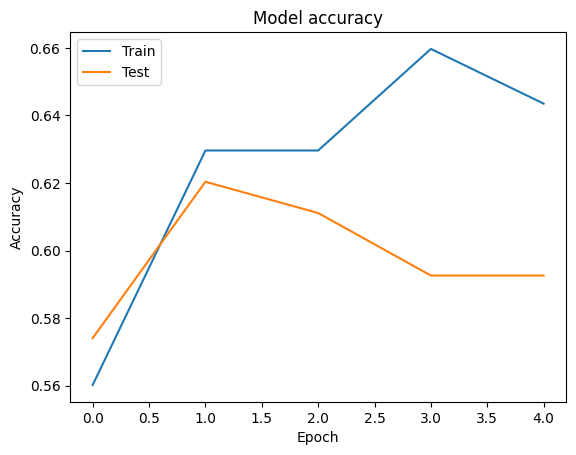

In [48]:
# Plot training & validation accuracy values

plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

# Accuracy is much better now

In [25]:
# Pull predictions out and visulaize them 

preds = model.predict(test)    # large numpy array; convert to pandas dataframe to make it easier to work with


4/4 [==============================] - 0s 54ms/step


In [26]:
import numpy as np 

predicted_class = np.argmax(preds,axis=1)    # turns predictions into a single number


In [27]:
#Array of index of original breeds 

predicted_class

array([2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 4, 2, 2, 2, 4, 4, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 2, 3, 1, 4, 2, 2, 0, 0, 0, 1, 4, 2, 4, 0, 1, 0, 0, 4,
       0, 4, 1, 4, 1, 2, 1, 4, 0, 4, 4, 4, 0, 1, 1, 2, 0, 3, 3, 1, 1, 4,
       3, 4, 1, 4, 4, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 4, 4, 0, 0])

In [28]:
actual_labels = np.concatenate([y for x,y in test],axis=0)   # flattens out batches and pulls out labels

In [29]:
actual_labels   # they are vectors so change them to single numbers
actual_class = np.argmax(actual_labels,axis=1)

In [30]:
# Get actual images of the dogs

import itertools

actual_image = [x.numpy().astype('uint8') for x,y in test]
actual_image = list(itertools.chain.from_iterable(actual_image))
actual_image = [Image.fromarray(a) for a in actual_image]

In [31]:
# create datframe from predicted, actual, and the images of the dogs

pred_df = pd.DataFrame(zip(predicted_class,actual_class,actual_image),columns=['prediction','actual','image'])


In [32]:
# change dog breeds from numbers to the actual names

pred_df['prediction'] = pred_df['prediction'].apply(lambda x : breeds[x])
pred_df['actual'] = pred_df['actual'].apply(lambda x : breeds[x])



In [33]:
# Disply Head of dataframe

pred_df.head()


,prediction,actual,image
0,doberman,bernese_mountain_dog,<PIL.Image.Image image mode=RGB size=256x256 a...
1,doberman,doberman,<PIL.Image.Image image mode=RGB size=256x256 a...
2,beagle,bernese_mountain_dog,<PIL.Image.Image image mode=RGB size=256x256 a...
3,doberman,doberman,<PIL.Image.Image image mode=RGB size=256x256 a...
4,doberman,bernese_mountain_dog,<PIL.Image.Image image mode=RGB size=256x256 a...


In [34]:
# Render actal images instead of image data

import base64
import io
def image(img):
    with io.BytesIO() as buffer:
        img.save(buffer,'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f'<img src="data:image/jpeg;base64,{img_str}">'
      

,prediction,actual,image
0,siberian_husky,siberian_husky,
1,siberian_husky,siberian_husky,
2,beagle,labrador_retriever,
3,siberian_husky,labrador_retriever,
4,beagle,beagle,
5,bernese_mountain_dog,bernese_mountain_dog,
6,doberman,doberman,
7,bernese_mountain_dog,doberman,
8,beagle,labrador_retriever,
9,siberian_husky,siberian_husky,

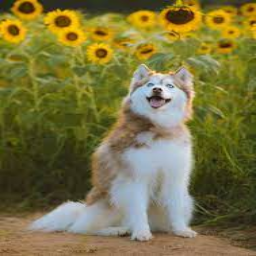
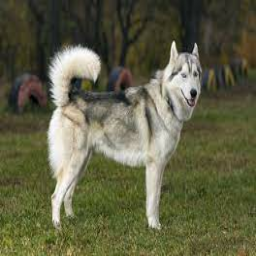
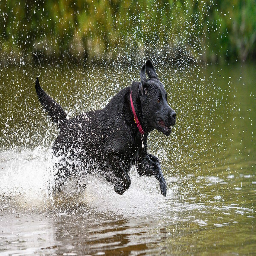
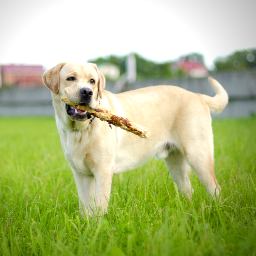
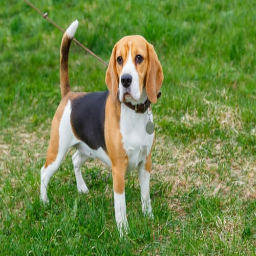
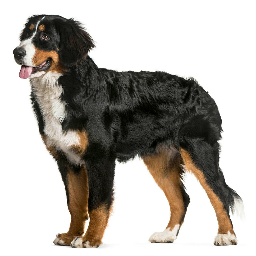
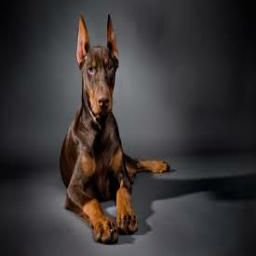
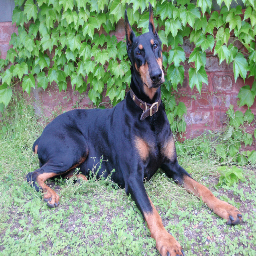
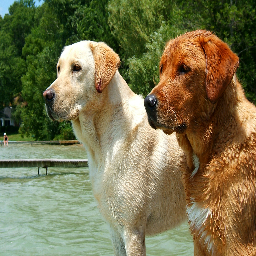
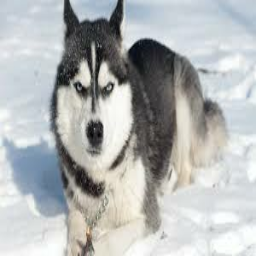

In [71]:
# Look at predictions and acrtual dogs

# Shuffle the DataFrame randomly
sample_df = pred_df.sample(frac=1).reset_index(drop=True)

# Select the first 10 rows
sample_df.head(10).style.format({'image':image})

# Some Images have low resolution and are hard to see/identify - Pictures with dogs in action are harder to identify/preidct

In [41]:
# Lets try to optimize further using keras tuner

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
 

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))  
    model.add(layers.experimental.preprocessing.RandomFlip('horizontal', seed=1))  # Randomly flip images
    model.add(layers.experimental.preprocessing.RandomRotation(0.2, seed=1))  # Randomly rotate images
    model.add(layers.experimental.preprocessing.RandomZoom(0.2, seed=1))  # Randomly zoom images
    model.add(layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
                            activation='relu',
                            input_shape=(256,256,3)))  # change input shape if necessary
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
                            kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
                            activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
                           activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))  # output layer

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
stop_early = EarlyStopping(monitor='val_loss', patience=5)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='project',
    project_name='Dog Breed Classifier')

tuner.search_space_summary()



tuner.search(train,
             epochs=10,
             validation_data=test,
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('dense_1_units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


Trial 3 Complete [00h 12m 17s]
val_accuracy: 0.24074074625968933

Best val_accuracy So Far: 0.37654320398966473
Total elapsed time: 00h 33m 20s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 80 and the optimal learning rate for the optimizer
is 0.001.



In [73]:
# First, get the optimal hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

model.compile(optimizer=keras.optimizers.Adam(best_hps.get('learning_rate')),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
history = model.fit(train, 
                    epochs=50, 
                    validation_data= test,verbose=1)



Epoch 1/50


/home/jd-ds/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 25s 2s/step - loss: 5.6308 - accuracy: 0.2292 - val_loss: 1.6661 - val_accuracy: 0.2315
Epoch 2/50
14/14 [==============================] - 23s 2s/step - loss: 1.5971 - accuracy: 0.2060 - val_loss: 1.7141 - val_accuracy: 0.1944
Epoch 3/50
14/14 [==============================] - 23s 2s/step - loss: 1.5912 - accuracy: 0.2569 - val_loss: 1.6075 - val_accuracy: 0.2407
Epoch 4/50
14/14 [==============================] - 24s 2s/step - loss: 1.6072 - accuracy: 0.2407 - val_loss: 1.6034 - val_accuracy: 0.2407
Epoch 5/50
14/14 [==============================] - 39s 3s/step - loss: 1.6069 - accuracy: 0.2431 - val_loss: 1.6059 - val_accuracy: 0.2407
Epoch 6/50
14/14 [==============================] - 23s 2s/step - loss: 1.6039 - accuracy: 0.2431 - val_loss: 1.6050 - val_accuracy: 0.2407
Epoch 7/50
14/14 [==============================] - 23s 2s/step - loss: 1.5929 - accuracy: 0.2847 - val_loss: 1.5420 - val_accuracy: 0.2778
Epoch 8/50
14/14 [=============

In [74]:
# Evaluate the model on the test data
score = model.evaluate(test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 1.5642235279083252
Test accuracy: 0.5462962985038757


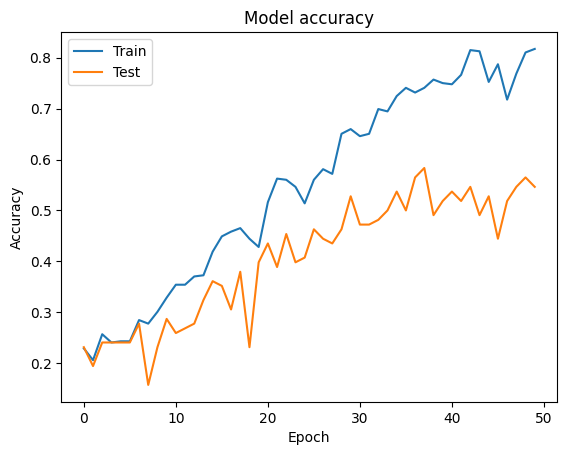

In [75]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


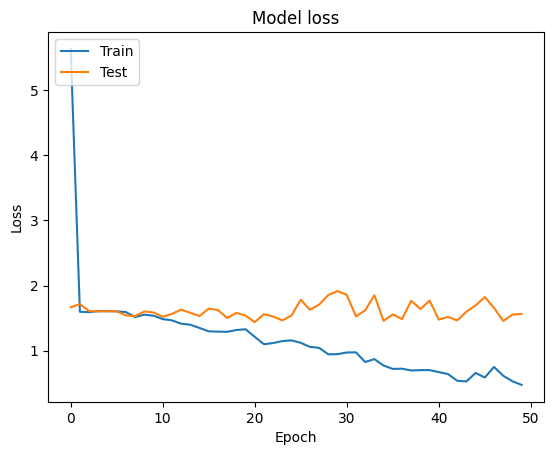

In [77]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()